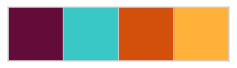

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or 'retina'
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, \
                            classification_report, precision_recall_curve, log_loss

sns.set(context='notebook', style='whitegrid')
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [2]:
%store -r weather_feature_sel

In [3]:
weather_feature_sel.head()

,Evaporation,Cloud3pm,WindGustSpeed,WindSpeed9am,Humidity3pm,Temp9am,Sunshine,Month_Name,Location,RainTomorrow
6049,12.0,5.0,48.0,6.000000,13.0,26.600000,12.3,Jan,Cobar,No
6050,14.8,1.0,37.0,19.000000,8.0,20.300000,13.0,Jan,Cobar,No
6051,12.6,1.0,30.0,14.636516,7.0,18.084507,13.3,Jan,Cobar,No
6052,10.8,6.0,46.0,30.000000,22.0,28.700000,10.6,Jan,Cobar,No
6053,11.4,5.0,31.0,6.000000,22.0,29.100000,12.2,Jan,Cobar,No


In [4]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
weather_feature_sel['RainTomorrow']= le.fit_transform(weather_feature_sel['RainTomorrow'])
weather_feature_sel['Month_Name']= le.fit_transform(weather_feature_sel['Month_Name'])
weather_feature_sel['Location']= le.fit_transform(weather_feature_sel['Location'])

In [5]:
X = weather_feature_sel.iloc[:, :9]
y = weather_feature_sel['RainTomorrow']

In [6]:
X.shape

(142193, 9)

In [7]:
y.shape

(142193,)

In [8]:
## Train,test and validation splits

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [10]:
X_train.shape, y_train.shape

((113754, 9), (113754,))

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify =y_train) # 0.25 x 0.8 = 0.2

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_val_scaled)


print(metrics.accuracy_score(y_val, y_pred))

0.8281233517352931


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[20481,  1582],
       [ 3306,  3070]])

## Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [16]:
X_scaled = scaler.fit_transform(X)


In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')

print(scores)
print('scores mean:{}'.format(np.mean(scores)))

[0.81673699 0.82158931 0.80513361 0.76714256 0.82811731 0.82938322
 0.80322104 0.79344539 0.75680428 0.82031085]
scores mean:0.8041884558695014


In [18]:
# search for an optimal value of K for KNN
k_range = list(range(1, 35))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

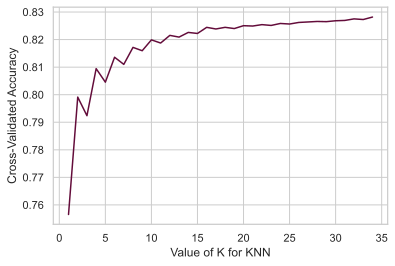

In [19]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

## GridSearch CV

In [20]:
from sklearn.model_selection import GridSearchCV



In [21]:
# define the parameter values that should be searched
k_range = list(range(1, 35))
weight_options = ['uniform', 'distance']

In [22]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], 'weights': ['uniform', 'distance']}


In [23]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=34),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [24]:
df_cv = pd.DataFrame(grid.cv_results_)
df_cv.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.142835,0.012684,5.424818,0.531749,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.769472,0.731285,0.792714,0.758562,0.730642,0.756535,0.023615,66
1,0.150862,0.017891,4.610170,0.204006,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.769472,0.731285,0.792714,0.758562,0.730642,0.756535,0.023615,66
2,0.148065,0.018396,6.894387,0.414847,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.807166,0.786842,0.812230,0.801533,0.787854,0.799125,0.010199,62
3,0.150163,0.007157,6.434614,0.340503,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.769472,0.731285,0.792714,0.758562,0.730642,0.756535,0.023615,66
4,0.145755,0.013680,7.840095,0.586294,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.805900,0.770773,0.820809,0.793938,0.770483,0.792381,0.019697,64


In [25]:
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 34, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=34)
Best score:  0.82817709874282


In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [44]:
def make_confusion_matrix(model, threshold=0.3):
    y_predict = (model.predict_proba(X_val_scaled)[:, 1] >= threshold)
    rain_matrix = confusion_matrix(y_val, y_predict)
    plt.figure(dpi=150)
    sns.heatmap(rain_matrix, cmap=plt.cm.Reds, annot=True, square=True, fmt='d',
           xticklabels=['No Rain', 'Rain'],
           yticklabels=['No Rain', 'Rain']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     22064
           1       0.58      0.66      0.61      6375

    accuracy                           0.81     28439
   macro avg       0.74      0.76      0.75     28439
weighted avg       0.82      0.81      0.82     28439



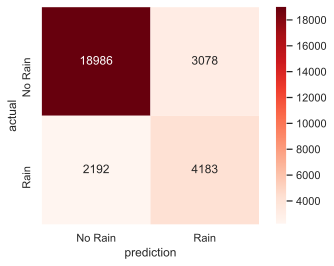

In [49]:
make_confusion_matrix(knn)


## Using Best Parameters to Predict

In [27]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=34)

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


print(metrics.accuracy_score(y_test, y_pred))

0.840571046801927


In [46]:
def make_confusion_matrix(model, threshold=0.3):
    y_predict = (model.predict_proba(X_test_scaled)[:, 1] >= threshold)
    rain_matrix = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=150)
    sns.heatmap(rain_matrix, cmap=plt.cm.Reds, annot=True, square=True, fmt='d',
           xticklabels=['No Rain', 'Rain'],
           yticklabels=['No Rain', 'Rain']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     22064
           1       0.58      0.66      0.61      6375

    accuracy                           0.81     28439
   macro avg       0.74      0.76      0.75     28439
weighted avg       0.82      0.81      0.82     28439



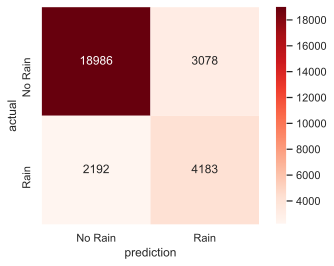

In [48]:
make_confusion_matrix(knn)